In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
import numpy as np

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

import torch
# if torch.cuda.is_available():
#     torch.set_default_device('cuda')
# else:
#     torch.set_default_device('cpu')

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs




INFO 04-28 15:34:11 [__init__.py:239] Automatically detected platform cuda.


In [3]:
ppo_interaction = ppo.PPO_interaction(interaction_configs=ppo_interaction_config_texas,
                    env_configs = texas_holdem_config,
                      actor_configs = actor_configs_texas,
                      critic_configs = critic_configs_texas,
                      llm_configs=texas_holdem_llm_agent_configs
                  )

train_scores, trained_agents = ppo_interaction.train_multiagent()
print(train_scores)

🖥  Using device: cuda
self obs size: 76
INFO 04-28 15:34:22 [config.py:689] This model supports multiple tasks: {'embed', 'reward', 'score', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 04-28 15:34:22 [config.py:1901] Chunked prefill is enabled with max_num_batched_tokens=16384.
WARNING 04-28 15:34:23 [utils.py:2304] We must use the `spawn` multiprocessing start method. Overriding VLLM_WORKER_MULTIPROC_METHOD to 'spawn'. See https://docs.vllm.ai/en/latest/getting_started/troubleshooting.html#python-multiprocessing for more information. Reason: CUDA is initialized
INFO 04-28 15:34:28 [__init__.py:239] Automatically detected platform cuda.
INFO 04-28 15:34:30 [core.py:61] Initializing a V1 LLM engine (v0.8.4) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:03<00:03,  3.65s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:05<00:00,  2.33s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:05<00:00,  2.53s/it]



INFO 04-28 15:34:36 [loader.py:458] Loading weights took 5.05 seconds
INFO 04-28 15:34:36 [gpu_model_runner.py:1291] Model loading took 12.8726 GiB and 5.352612 seconds
INFO 04-28 15:34:44 [backends.py:416] Using cache directory: /home/hice1/mxenakis3/.cache/vllm/torch_compile_cache/d2ef6609b2/rank_0_0 for vLLM's torch.compile
INFO 04-28 15:34:44 [backends.py:426] Dynamo bytecode transform time: 7.27 s
INFO 04-28 15:34:44 [backends.py:115] Directly load the compiled graph for shape None from the cache
INFO 04-28 15:34:49 [monitor.py:33] torch.compile takes 7.27 s in total
INFO 04-28 15:34:50 [kv_cache_utils.py:634] GPU KV cache size: 116,560 tokens
INFO 04-28 15:34:50 [kv_cache_utils.py:637] Maximum concurrency for 4,096 tokens per request: 28.46x
INFO 04-28 15:35:04 [gpu_model_runner.py:1626] Graph capturing finished in 14 secs, took 0.58 GiB
INFO 04-28 15:35:04 [core.py:163] init engine (profile, create kv cache, warmup model) took 27.48 seconds
INFO 04-28 15:35:04 [core_client.py:43

  0%|          | 0/10 [00:00<?, ?it/s]

INFO 04-28 15:35:05 [chat_utils.py:396] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


100%|██████████| 10/10 [00:18<00:00,  1.85s/it]

[np.float64(-3.0), np.float64(-1.0), np.float64(2.0), np.float64(0.5), np.float64(4.0), np.float64(1.0), np.float64(1.0), np.float64(-1.0), np.float64(-2.0), np.float64(-0.5)]


In [4]:
test_scores = ppo_interaction.test_multiagent(trained_agents)
print(test_scores)




100%|██████████| 5/5 [00:00<00:00, 630.80it/s]

[np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(3.0), np.float64(-1.0)]


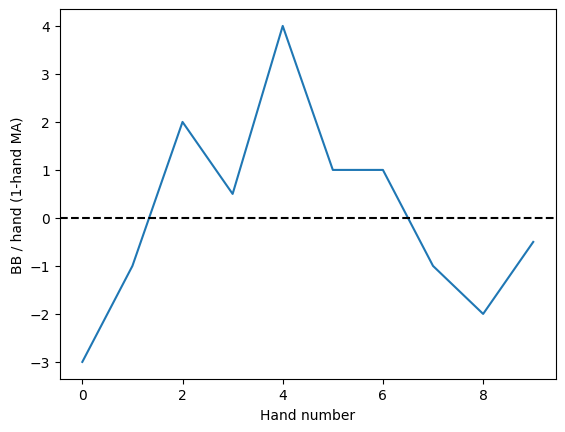

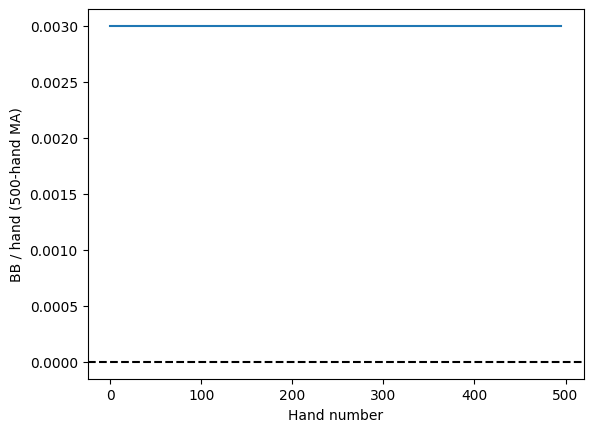

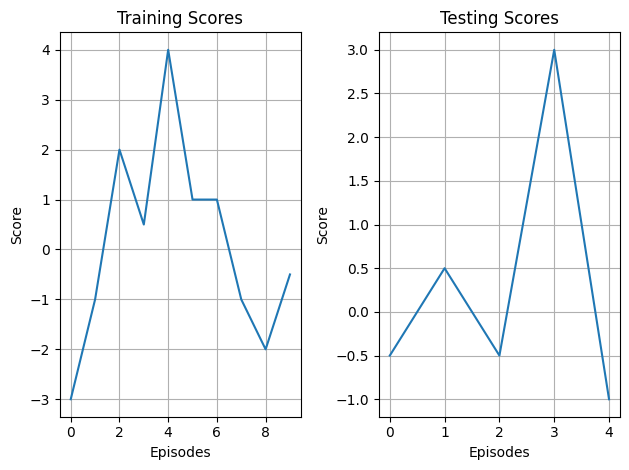

In [5]:
import matplotlib.pyplot as plt

window = 1
rolling = np.convolve(train_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()

window = 500
rolling = np.convolve(test_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()


fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()
